## Import

In [135]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from category_encoders.binary import BinaryEncoder

## Baseline

dataset from seminar3

In [2]:
telecom_churn = pd.read_csv('telecom_churn.csv')

In [3]:
telecom_churn.sample(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2912,WY,151,415,394-8861,no,no,0,170.2,89,28.93,...,83,15.94,119.5,100,5.38,4.3,3,1.16,0,False
232,OK,100,415,352-4221,no,no,0,203.1,96,34.53,...,126,18.45,180.9,122,8.14,13.5,2,3.65,3,False
2584,GA,64,510,412-7791,no,no,0,216.9,78,36.87,...,115,17.94,179.8,116,8.09,11.4,5,3.08,3,False


making baseline prediction as a check point

In [4]:
X = telecom_churn.drop(columns=['churn', 'state','phone number', 'international plan', 'voice mail plan'])
y = telecom_churn['churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

# Модель
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds_valid = knn.predict(X_valid)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.889055472263868
Precision=0.7209302325581395
Recall=0.3333333333333333


save the baseline results

In [5]:
base_acc = accuracy_score(y_valid, preds_valid)
base_prec = precision_score(y_valid, preds_valid)
base_rec = recall_score(y_valid, preds_valid)

## EDA

check for NA

In [19]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

no NA found

check for duplicates

In [20]:
telecom_churn[telecom_churn.duplicated()]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


no duplicates

split on data and target

In [21]:
X = telecom_churn.drop(columns=['churn'])
y = telecom_churn['churn']
X.sample(4)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1187,FL,142,415,357-4936,no,yes,26,220.5,94,37.49,239.5,126,20.36,254.3,109,11.44,5.9,9,1.59,2
69,TX,150,510,374-8042,no,no,0,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,13.8,3,3.73,4
2525,TN,95,510,365-7784,no,no,0,174.0,57,29.58,281.1,118,23.89,197.2,94,8.87,9.7,2,2.62,0
1416,NV,27,510,398-7414,no,no,0,177.6,121,30.19,296.8,92,25.23,192.9,106,8.68,7.6,3,2.05,3


phone number is not usefull

In [22]:
X = X.drop(columns=['phone number'])

encode binary features 'international plan' and 'voice mail plan'

In [23]:
l_enc = LabelEncoder()

In [24]:
X['international plan'] = l_enc.fit_transform(X['international plan'])

In [25]:
X['voice mail plan'] = l_enc.fit_transform(X['voice mail plan'])

In [26]:
X.sample(4)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1495,VT,128,510,0,1,32,222.9,136,37.89,262.0,80,22.27,191.4,101,8.61,10.8,4,2.92,0
596,MN,124,510,0,0,0,157.5,70,26.78,130.7,79,11.11,193.4,98,8.70,9.6,4,2.59,3
1939,AZ,113,510,0,0,0,128.7,100,21.88,227.1,67,19.30,178.1,135,8.01,9.2,4,2.48,2
3146,MS,143,510,0,0,0,155.4,112,26.42,290.9,92,24.73,228.4,91,10.28,13.9,5,3.75,1


In [27]:
X['state'].unique().shape[0]

51

drop some features

In [28]:
X = X.drop(columns=['account length', 'area code', 'state'])

check correlation

<AxesSubplot: >

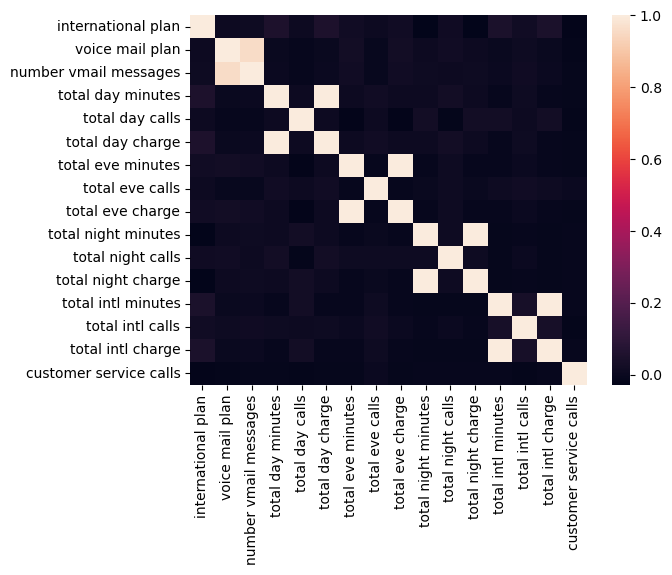

In [29]:
sns.heatmap(X.corr())

drop features with high correlation

<AxesSubplot: >

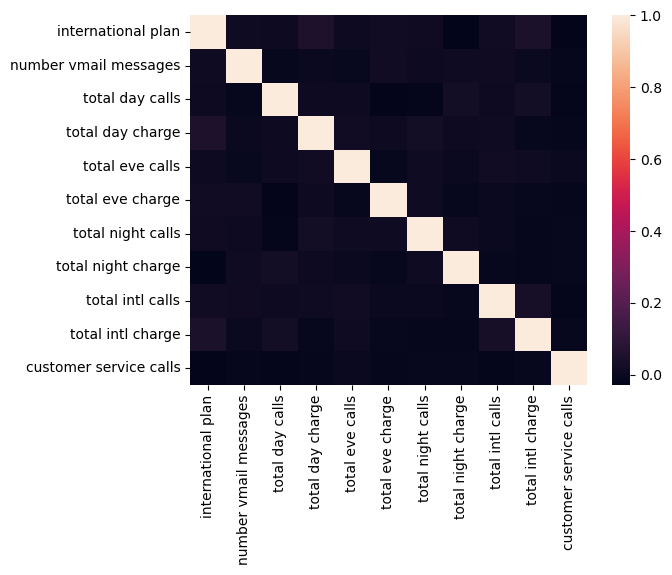

In [30]:
X = X.drop(columns=['voice mail plan','total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])
sns.heatmap(X.corr())

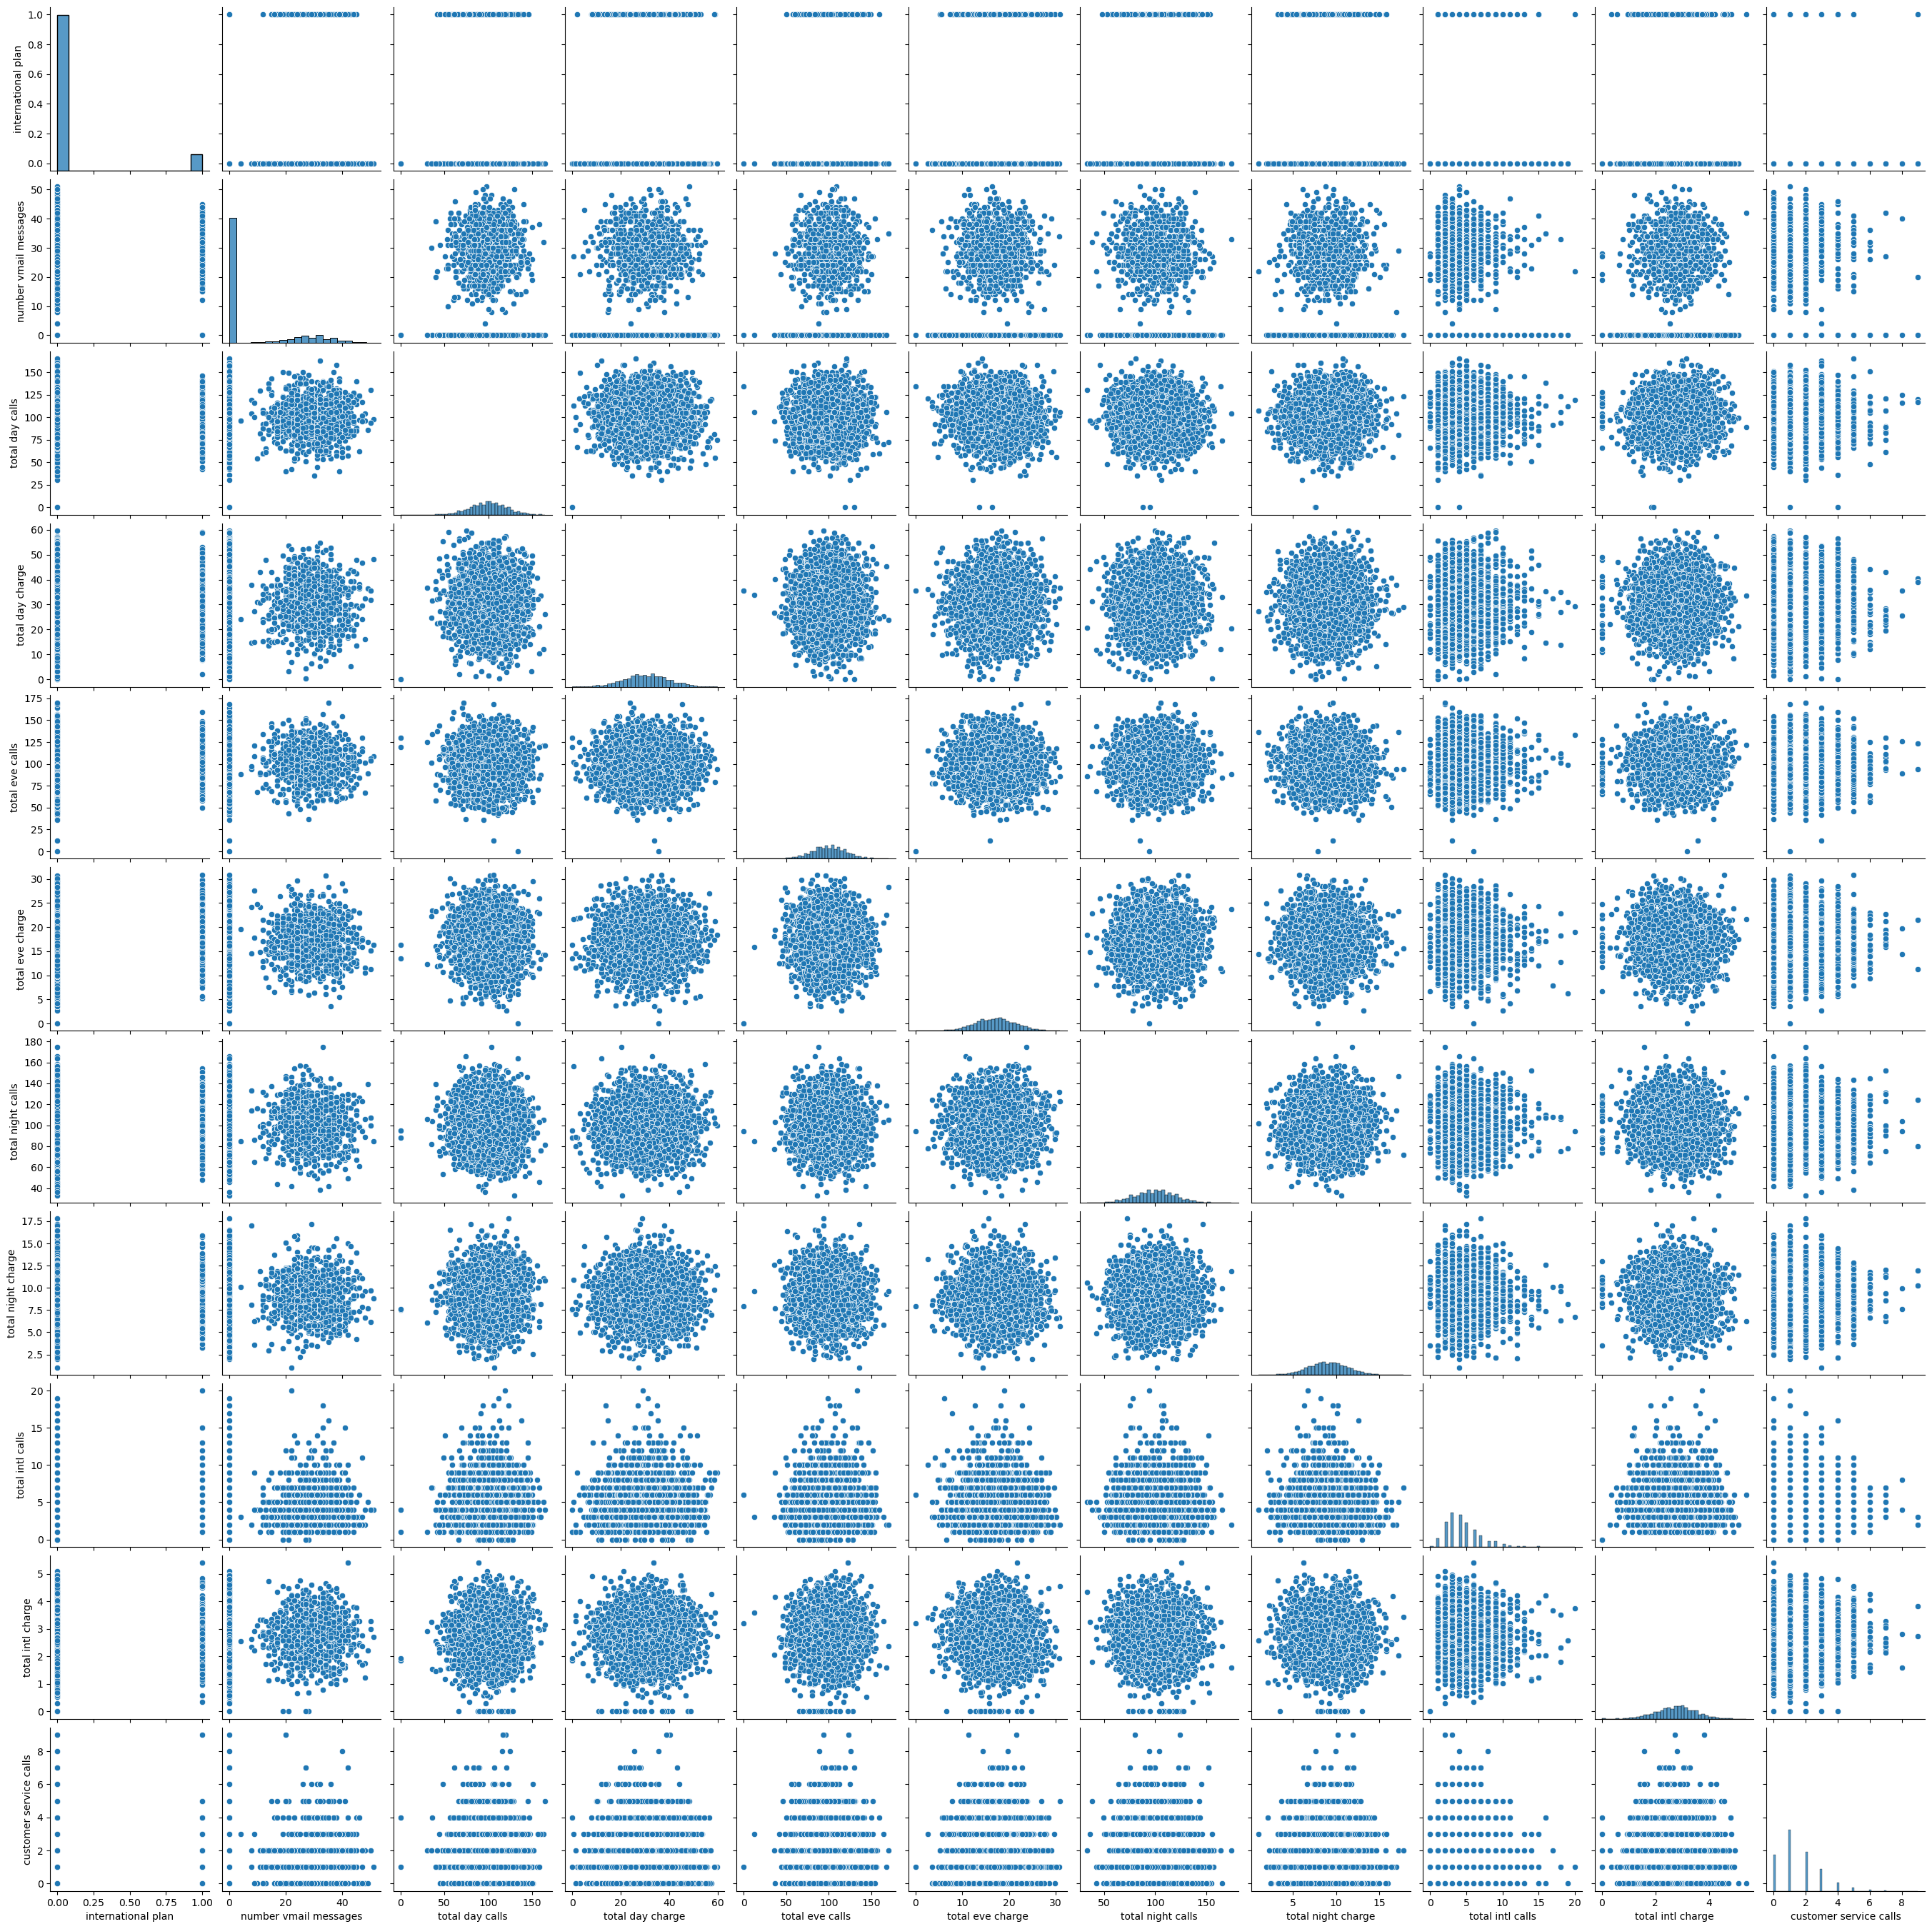

In [68]:
sns.pairplot(X)
plt.show()

## Modeling

split on train and test

In [123]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

normalize data

In [124]:
std_scaler = StandardScaler()
std_scaler.fit(X_train, y_train)

X_train_normed = std_scaler.transform(X_train)
X_valid_normed = std_scaler.transform(X_valid)

#### KNN

In [126]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_normed, y_train)
preds_valid = knn.predict(X_valid_normed)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.9070464767616192
Precision=0.8301886792452831
Recall=0.4536082474226804


#### PCA

In [155]:
pca = PCA(11)
pca.fit(X_train_normed, y_train)
X_train_pca = pca.transform(X_train_normed)
X_valid_pca = pca.transform(X_valid_normed)

In [156]:
knn.fit(X_train_pca, y_train)
preds_valid = knn.predict(X_valid_pca)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.9070464767616192
Precision=0.8301886792452831
Recall=0.4536082474226804


#### GridsearchCV

In [133]:
parameters = {'n_neighbors' : (1, 3, 5, 7, 9), 'algorithm' : ('auto','ball_tree', 'kd_tree', 'brute'), 'weights' : ('uniform','distance')}
model = KNeighborsClassifier(n_jobs=-1)
gsCV = GridSearchCV(model, param_grid=parameters, scoring='accuracy')
gsCV.fit(X_train_normed, y_train)
gsCV.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [134]:
preds_valid = gsCV.predict(X_valid_normed)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.8905547226386806
Precision=0.6875
Recall=0.4536082474226804
